In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pickle
from pyESN import ESN, optimal_esn
from skesn.esn import EsnForecaster

import restools
from comsdk.research import Research

In [5]:
res = Research.open('RC_MOEHLIS')
task_num = 42

data = []
time = []
n_files = 100

for num_data in range(n_files):
    with open(os.path.join(res.get_task_path(task_num), str(num_data+1)), 'rb') as a:
        b = pickle.load(a)
    data.append(b['timeseries'])
    time.append(b['time'])

Loaded research at C:\Users\ovann\Documents\Researches\2021-04-30-predicting-transition-to-turbulence-using-esn
Number of tasks in the current research: 59


In [7]:
df_time_len = pd.DataFrame(
    {
        'time_len': [len(i) for i in time],
        'file_name': [i+1 for i in range(n_files)]
    })

df_time_len.sort_values(by=['time_len'], inplace=True)

Text(0.5, 0, 'Position')

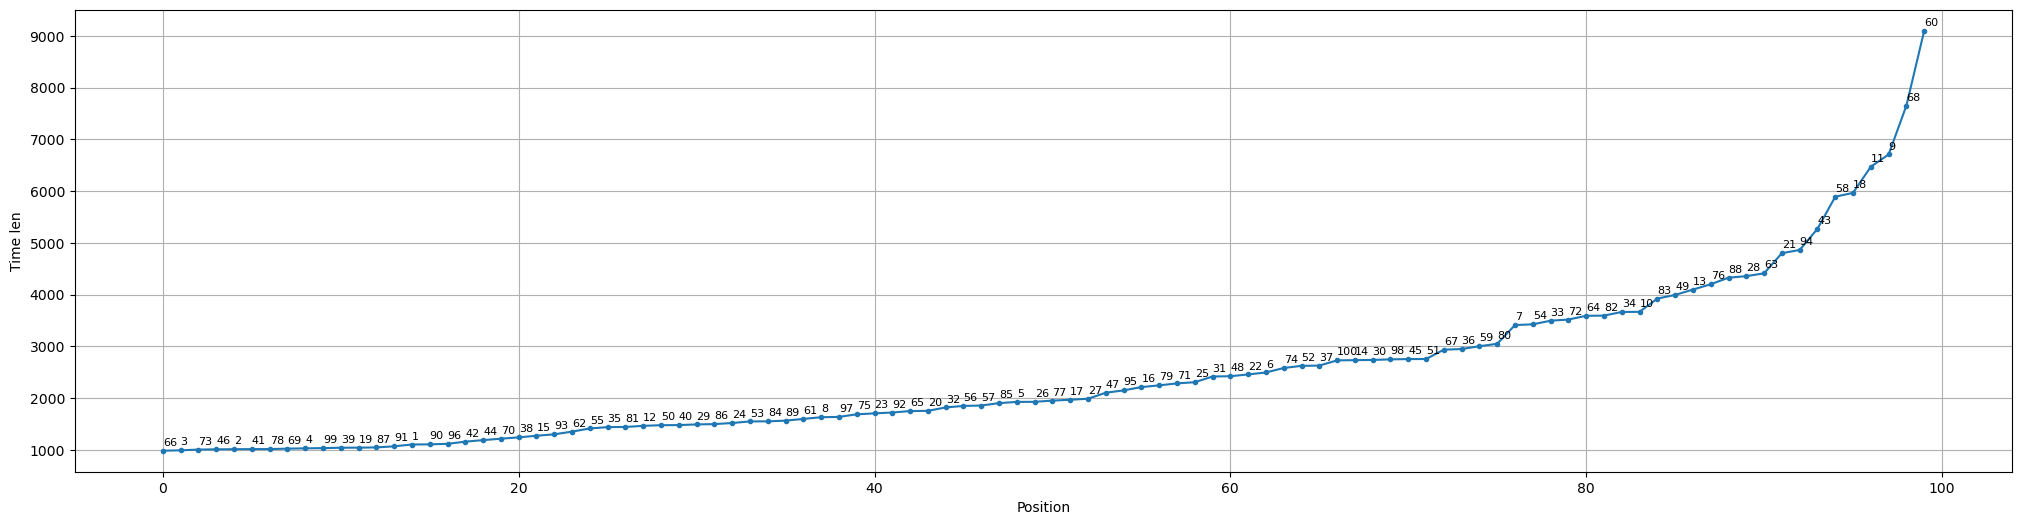

In [8]:
plt.figure(figsize=(25,6))
plt.plot(range(n_files), df_time_len.time_len, '.-')
for i, j, k in zip(df_time_len.time_len, df_time_len.file_name, range(n_files)):
    plt.text(k, i+100, j, fontsize=8.)
plt.grid()
plt.ylabel('Time len')
plt.xlabel('Position')

In [9]:
n = 60 - 1
datalen = len(time[n])
trainlen = int(len(time[n])*0.8)
testlen = datalen - trainlen

training_timeseries = data[n][:trainlen]
test_timeseries_set = [data[n][trainlen:]]

In [10]:
spectral_radius_values = [0.5]
sparsity_values = [0.1]

esn, errors = optimal_esn(
    training_timeseries, 
    test_timeseries_set, 
    spectral_radius_values=spectral_radius_values, 
    sparsity_values=sparsity_values,
    n_reservoir=1500, 
    return_errors=True, 
    random_seed_starts_at=42, 
    trial_number=1
)

Spectral radius = 0.5
	Sparsity = 0.1
		Trial #42
			New best ESN. Error = 0.20752076374075104, spectral radius = 0.5, sparsity = 0.1


In [13]:
model = EsnForecaster(
    n_reservoir=1500,
    spectral_radius=spectral_radius_values[0],
    sparsity=sparsity_values[0],
    regularization='l2',
    lambda_r=0.001,
    random_state=42
)

model.fit(training_timeseries)

EsnForecaster(n_reservoir=1500, random_state=42, regularization='l2',
              sparsity=0.1, spectral_radius=0.5,
              use_additive_noise_when_forecasting=False)

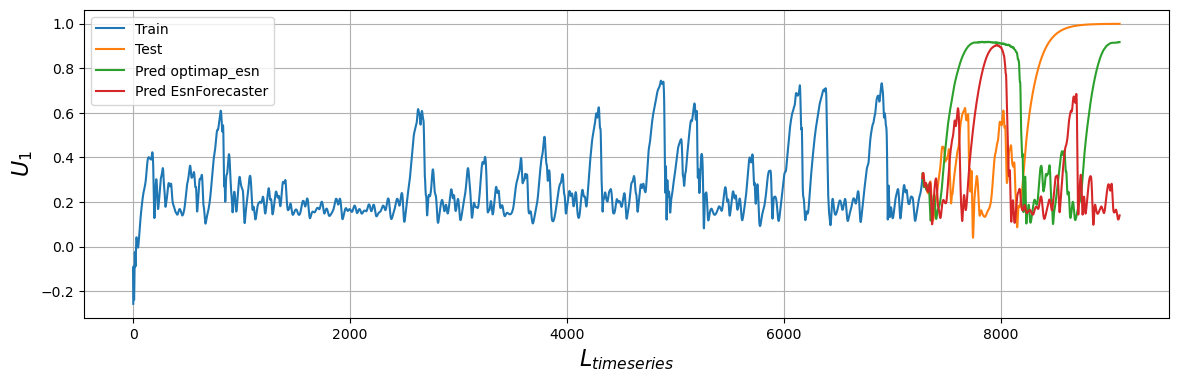

In [25]:
N = 1

plt.figure(figsize=(14,4*N))

esn_pred = esn.predict(np.ones(testlen))
model_pred = model.predict(testlen)

for i in range(N):
    plt.subplot(N,1,i+1)
    
    plt.plot(time[n][:trainlen], training_timeseries[:, i], label='Train')
    plt.plot(time[n][trainlen:], test_timeseries_set[0][:, i], label='Test')
    plt.plot(time[n][trainlen:], esn_pred[:, i], label='Pred optimap_esn')
    plt.plot(time[n][trainlen:], model_pred[:, i], label='Pred EsnForecaster')

    plt.xlabel(r'$L_{timeseries}$', fontsize=16)
    plt.ylabel(fr'$U_{i+1}$', fontsize=16)
    
    plt.legend()
    plt.grid()

In [32]:
n = 66 - 1
datalen = len(time[n])
trainlen = int(len(time[n])*0.8)
testlen = datalen - trainlen

training_timeseries = data[n][:trainlen]
test_timeseries_set = [data[n][trainlen:]]

In [33]:
spectral_radius_values = [0.5]
sparsity_values = [0.1]

esn, errors = optimal_esn(
    training_timeseries, 
    test_timeseries_set, 
    spectral_radius_values=spectral_radius_values, 
    sparsity_values=sparsity_values,
    n_reservoir=1500, 
    return_errors=True, 
    random_seed_starts_at=42, 
    trial_number=1
)

Spectral radius = 0.5
	Sparsity = 0.1
		Trial #42
			New best ESN. Error = 0.00023722571590726176, spectral radius = 0.5, sparsity = 0.1


In [34]:
model = EsnForecaster(
    n_reservoir=1500,
    spectral_radius=spectral_radius_values[0],
    sparsity=sparsity_values[0],
    regularization='l2',
    lambda_r=0.001,
    random_state=42
)

model.fit(training_timeseries)

EsnForecaster(n_reservoir=1500, random_state=42, regularization='l2',
              sparsity=0.1, spectral_radius=0.5,
              use_additive_noise_when_forecasting=False)

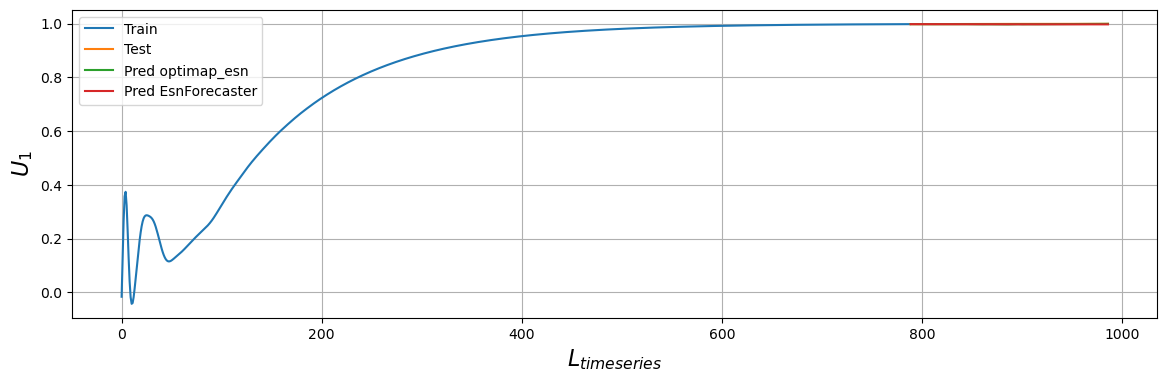

In [35]:
N = 1

plt.figure(figsize=(14,4*N))

esn_pred = esn.predict(np.ones(testlen))
model_pred = model.predict(testlen)

for i in range(N):
    plt.subplot(N,1,i+1)
    
    plt.plot(time[n][:trainlen], training_timeseries[:, i], label='Train')
    plt.plot(time[n][trainlen:], test_timeseries_set[0][:, i], label='Test')
    plt.plot(time[n][trainlen:], esn_pred[:, i], label='Pred optimap_esn')
    plt.plot(time[n][trainlen:], model_pred[:, i], label='Pred EsnForecaster')

    plt.xlabel(r'$L_{timeseries}$', fontsize=16)
    plt.ylabel(fr'$U_{i+1}$', fontsize=16)
    
    plt.legend()
    plt.grid()

In [37]:
df = pd.read_csv('Datasets/df_optimal_esn.csv')
df1 = pd.read_csv('Datasets/df_EsnForecaster.csv')

In [40]:
df.iloc[[0, -1], :]

,Unnamed: 0,n_file,len,error_min
0,65,66,986,0.000237
99,59,60,9097,0.207521


In [41]:
df1.iloc[[0, -1], :]

,Unnamed: 0,n_file,len,error_min
0,65,66,986,0.000171
99,59,60,9097,0.194359


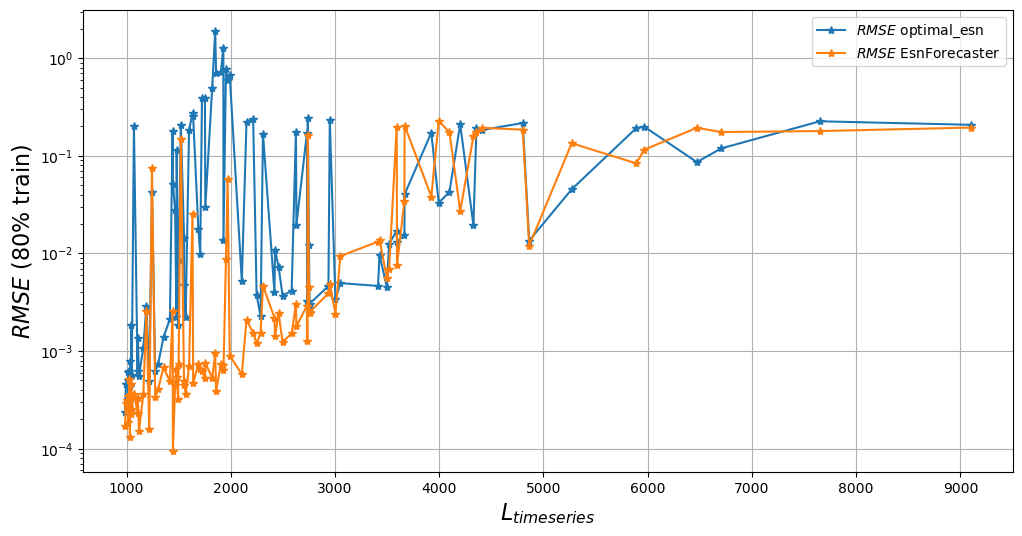

In [58]:
plt.figure(figsize=(12,6))
plt.plot(df.len, df.error_min, '*-', label='$RMSE$ optimal_esn')
plt.plot(df1.len, df1.error_min, '*-', label='$RMSE$ EsnForecaster')

plt.semilogy();
plt.xlabel(r'$L_{timeseries}$', fontsize=16)
plt.ylabel(f'$RMSE$ (80% train)', fontsize=16)
plt.legend()
plt.grid()